<a href="https://colab.research.google.com/github/yesalgado/Archivos_CSV/blob/main/Cuadernos_de_trabajo/Revisar3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/yesalgado/Archivos_CSV/main/"

In [3]:
archivo = "DataLimpia.csv"

In [4]:
Car = pd.read_csv(url+archivo)

In [5]:
Car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25466 entries, 0 to 25465
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       25466 non-null  int64  
 1   index            25466 non-null  int64  
 2   price            25466 non-null  int64  
 3   year             25466 non-null  int64  
 4   manufacturer     25466 non-null  object 
 5   model            25466 non-null  object 
 6   nummodel         25466 non-null  int64  
 7   cylinders        25466 non-null  object 
 8   numcylinders     25466 non-null  int64  
 9   odometer         25466 non-null  float64
 10  title_status     25466 non-null  object 
 11  numtitle_status  25466 non-null  int64  
 12  transmission     25466 non-null  object 
 13  numtransmission  25466 non-null  int64  
 14  drive            25466 non-null  object 
 15  numdrive         25466 non-null  int64  
 16  size             25466 non-null  object 
 17  numsize     

In [6]:
Car.columns

Index(['Unnamed: 0', 'index', 'price', 'year', 'manufacturer', 'model',
       'nummodel', 'cylinders', 'numcylinders', 'odometer', 'title_status',
       'numtitle_status', 'transmission', 'numtransmission', 'drive',
       'numdrive', 'size', 'numsize', 'type', 'numtype', 'paint_color',
       'numpaint_color', 'state', 'numstate'],
      dtype='object')

In [7]:
Car = Car.drop(['Unnamed: 0','index'], axis= 1)

In [8]:
Car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25466 entries, 0 to 25465
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            25466 non-null  int64  
 1   year             25466 non-null  int64  
 2   manufacturer     25466 non-null  object 
 3   model            25466 non-null  object 
 4   nummodel         25466 non-null  int64  
 5   cylinders        25466 non-null  object 
 6   numcylinders     25466 non-null  int64  
 7   odometer         25466 non-null  float64
 8   title_status     25466 non-null  object 
 9   numtitle_status  25466 non-null  int64  
 10  transmission     25466 non-null  object 
 11  numtransmission  25466 non-null  int64  
 12  drive            25466 non-null  object 
 13  numdrive         25466 non-null  int64  
 14  size             25466 non-null  object 
 15  numsize          25466 non-null  int64  
 16  type             25466 non-null  object 
 17  numtype     

In [9]:
pip install pycaret

In [10]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [11]:
from pycaret.regression import *

In [13]:
regression = setup(data=Car, target='price', session_id=123,
         categorical_features= ['model', 'cylinders', 'title_status', 'transmission', 'drive', 
                                'size', 'type', 'paint_color', 'state'],
         numeric_features=['year', 'odometer'],
          ignore_features=['nummodel', 'numcylinders', 'numtitle_status', 'numtransmission',
                          'numdrive', 'numsize', 'numtype', 'numpaint_color', 'numstate'],
         fold_strategy='timeseries',
         transformation= True,
         transformation_method='yeo-johnson',
         combine_rare_levels= True,
         rare_level_threshold= 0.1,
         #remove_multicollinearity= True,
         multicollinearity_threshold=0.95,
         html= False,
         silent= True,
         pca= True,
         train_size= 0.8,
         use_gpu = True)

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target,price
2,Original Data,"(25466, 22)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,10
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(20372, 527)"


In [14]:
best_model = compare_models(fold=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,3283.8548,3.492360e+08,13075.5924,-7.5493,0.594,0.5024,0.4067


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,2424.5866,1.174307e+07,3426.3668,0.7260,0.5622,0.3940,0.1267
lr,Linear Regression,3283.8548,3.492360e+08,13075.5924,-7.5493,0.5940,0.5024,0.4067


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,2391.8376,1.148187e+07,3388.1336,0.7320,0.5667,0.3910,0.1467
lasso,Lasso Regression,2424.5866,1.174307e+07,3426.3668,0.7260,0.5622,0.3940,0.1267
lr,Linear Regression,3283.8548,3.492360e+08,13075.5924,-7.5493,0.5940,0.5024,0.4067


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,2391.8376,1.148187e+07,3388.1336,0.7320,0.5667,0.3910,0.1467
lasso,Lasso Regression,2424.5866,1.174307e+07,3426.3668,0.7260,0.5622,0.3940,0.1267
en,Elastic Net,3288.4599,1.988309e+07,4457.2643,0.5365,0.5007,0.5098,0.1033
lr,Linear Regression,3283.8548,3.492360e+08,13075.5924,-7.5493,0.5940,0.5024,0.4067


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,2391.8376,1.148187e+07,3388.1336,0.7320,0.5667,0.3910,0.1467
lasso,Lasso Regression,2424.5866,1.174307e+07,3426.3668,0.7260,0.5622,0.3940,0.1267
en,Elastic Net,3288.4599,1.988309e+07,4457.2643,0.5365,0.5007,0.5098,0.1033
lr,Linear Regression,3283.8548,3.492360e+08,13075.5924,-7.5493,0.5940,0.5024,0.4067
lar,Least Angle Regression,50364.6640,7.586667e+11,505440.5003,-18605.4222,1.0083,6.7055,0.6500


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,2391.8376,1.148187e+07,3388.1336,0.7320,0.5667,0.3910,0.1467
lasso,Lasso Regression,2424.5866,1.174307e+07,3426.3668,0.7260,0.5622,0.3940,0.1267
llar,Lasso Least Angle Regression,2608.1222,1.324549e+07,3636.7710,0.6914,0.5474,0.4123,0.2333
en,Elastic Net,3288.4599,1.988309e+07,4457.2643,0.5365,0.5007,0.5098,0.1033
lr,Linear Regression,3283.8548,3.492360e+08,13075.5924,-7.5493,0.5940,0.5024,0.4067
lar,Least Angle Regression,50364.6640,7.586667e+11,505440.5003,-18605.4222,1.0083,6.7055,0.6500


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,2391.8376,1.148187e+07,3388.1336,0.7320,0.5667,0.3910,0.1467
lasso,Lasso Regression,2424.5866,1.174307e+07,3426.3668,0.7260,0.5622,0.3940,0.1267
llar,Lasso Least Angle Regression,2608.1222,1.324549e+07,3636.7710,0.6914,0.5474,0.4123,0.2333
omp,Orthogonal Matching Pursuit,2655.4865,1.351282e+07,3675.7141,0.6846,0.5659,0.4220,0.1800
en,Elastic Net,3288.4599,1.988309e+07,4457.2643,0.5365,0.5007,0.5098,0.1033
lr,Linear Regression,3283.8548,3.492360e+08,13075.5924,-7.5493,0.5940,0.5024,0.4067
lar,Least Angle Regression,50364.6640,7.586667e+11,505440.5003,-18605.4222,1.0083,6.7055,0.6500


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,2391.8376,1.148187e+07,3388.1336,0.7320,0.5667,0.3910,0.1467
br,Bayesian Ridge,2396.8037,1.148248e+07,3388.2119,0.7320,0.5618,0.3913,1.6133
lasso,Lasso Regression,2424.5866,1.174307e+07,3426.3668,0.7260,0.5622,0.3940,0.1267
llar,Lasso Least Angle Regression,2608.1222,1.324549e+07,3636.7710,0.6914,0.5474,0.4123,0.2333
omp,Orthogonal Matching Pursuit,2655.4865,1.351282e+07,3675.7141,0.6846,0.5659,0.4220,0.1800
en,Elastic Net,3288.4599,1.988309e+07,4457.2643,0.5365,0.5007,0.5098,0.1033
lr,Linear Regression,3283.8548,3.492360e+08,13075.5924,-7.5493,0.5940,0.5024,0.4067
lar,Least Angle Regression,50364.6640,7.586667e+11,505440.5003,-18605.4222,1.0083,6.7055,0.6500


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,2391.8376,1.148187e+07,3388.1336,0.7320,0.5667,0.3910,0.1467
br,Bayesian Ridge,2396.8037,1.148248e+07,3388.2119,0.7320,0.5618,0.3913,1.6133
lasso,Lasso Regression,2424.5866,1.174307e+07,3426.3668,0.7260,0.5622,0.3940,0.1267
par,Passive Aggressive Regressor,2372.5920,1.198659e+07,3461.7382,0.7203,0.5429,0.3736,14.9767
llar,Lasso Least Angle Regression,2608.1222,1.324549e+07,3636.7710,0.6914,0.5474,0.4123,0.2333
omp,Orthogonal Matching Pursuit,2655.4865,1.351282e+07,3675.7141,0.6846,0.5659,0.4220,0.1800
en,Elastic Net,3288.4599,1.988309e+07,4457.2643,0.5365,0.5007,0.5098,0.1033
lr,Linear Regression,3283.8548,3.492360e+08,13075.5924,-7.5493,0.5940,0.5024,0.4067
lar,Least Angle Regression,50364.6640,7.586667e+11,505440.5003,-18605.4222,1.0083,6.7055,0.6500


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,2391.8376,1.148187e+07,3388.1336,0.7320,0.5667,0.3910,0.1467
br,Bayesian Ridge,2396.8037,1.148248e+07,3388.2119,0.7320,0.5618,0.3913,1.6133
huber,Huber Regressor,2350.8230,1.172103e+07,3423.2586,0.7265,0.5416,0.3761,9.1900
lasso,Lasso Regression,2424.5866,1.174307e+07,3426.3668,0.7260,0.5622,0.3940,0.1267
par,Passive Aggressive Regressor,2372.5920,1.198659e+07,3461.7382,0.7203,0.5429,0.3736,14.9767
llar,Lasso Least Angle Regression,2608.1222,1.324549e+07,3636.7710,0.6914,0.5474,0.4123,0.2333
omp,Orthogonal Matching Pursuit,2655.4865,1.351282e+07,3675.7141,0.6846,0.5659,0.4220,0.1800
en,Elastic Net,3288.4599,1.988309e+07,4457.2643,0.5365,0.5007,0.5098,0.1033
lr,Linear Regression,3283.8548,3.492360e+08,13075.5924,-7.5493,0.5940,0.5024,0.4067
lar,Least Angle Regression,50364.6640,7.586667e+11,505440.5003,-18605.4222,1.0083,6.7055,0.6500


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,2285.3474,1.117948e+07,3342.2693,0.7385,0.3981,0.3510,34.2367
ridge,Ridge Regression,2391.8376,1.148187e+07,3388.1336,0.7320,0.5667,0.3910,0.1467
br,Bayesian Ridge,2396.8037,1.148248e+07,3388.2119,0.7320,0.5618,0.3913,1.6133
huber,Huber Regressor,2350.8230,1.172103e+07,3423.2586,0.7265,0.5416,0.3761,9.1900
lasso,Lasso Regression,2424.5866,1.174307e+07,3426.3668,0.7260,0.5622,0.3940,0.1267
par,Passive Aggressive Regressor,2372.5920,1.198659e+07,3461.7382,0.7203,0.5429,0.3736,14.9767
llar,Lasso Least Angle Regression,2608.1222,1.324549e+07,3636.7710,0.6914,0.5474,0.4123,0.2333
omp,Orthogonal Matching Pursuit,2655.4865,1.351282e+07,3675.7141,0.6846,0.5659,0.4220,0.1800
en,Elastic Net,3288.4599,1.988309e+07,4457.2643,0.5365,0.5007,0.5098,0.1033
lr,Linear Regression,3283.8548,3.492360e+08,13075.5924,-7.5493,0.5940,0.5024,0.4067


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,2285.3474,1.117948e+07,3342.2693,0.7385,0.3981,0.3510,34.2367
ridge,Ridge Regression,2391.8376,1.148187e+07,3388.1336,0.7320,0.5667,0.3910,0.1467
br,Bayesian Ridge,2396.8037,1.148248e+07,3388.2119,0.7320,0.5618,0.3913,1.6133
huber,Huber Regressor,2350.8230,1.172103e+07,3423.2586,0.7265,0.5416,0.3761,9.1900
lasso,Lasso Regression,2424.5866,1.174307e+07,3426.3668,0.7260,0.5622,0.3940,0.1267
par,Passive Aggressive Regressor,2372.5920,1.198659e+07,3461.7382,0.7203,0.5429,0.3736,14.9767
llar,Lasso Least Angle Regression,2608.1222,1.324549e+07,3636.7710,0.6914,0.5474,0.4123,0.2333
omp,Orthogonal Matching Pursuit,2655.4865,1.351282e+07,3675.7141,0.6846,0.5659,0.4220,0.1800
en,Elastic Net,3288.4599,1.988309e+07,4457.2643,0.5365,0.5007,0.5098,0.1033
dt,Decision Tree Regressor,2870.1291,2.055572e+07,4526.9073,0.5183,0.5239,0.4048,7.7200


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,2045.5241,9.747671e+06,3118.2109,0.7720,0.3770,0.3218,351.0033
knn,K Neighbors Regressor,2285.3474,1.117948e+07,3342.2693,0.7385,0.3981,0.3510,34.2367
ridge,Ridge Regression,2391.8376,1.148187e+07,3388.1336,0.7320,0.5667,0.3910,0.1467
br,Bayesian Ridge,2396.8037,1.148248e+07,3388.2119,0.7320,0.5618,0.3913,1.6133
huber,Huber Regressor,2350.8230,1.172103e+07,3423.2586,0.7265,0.5416,0.3761,9.1900
lasso,Lasso Regression,2424.5866,1.174307e+07,3426.3668,0.7260,0.5622,0.3940,0.1267
par,Passive Aggressive Regressor,2372.5920,1.198659e+07,3461.7382,0.7203,0.5429,0.3736,14.9767
llar,Lasso Least Angle Regression,2608.1222,1.324549e+07,3636.7710,0.6914,0.5474,0.4123,0.2333
omp,Orthogonal Matching Pursuit,2655.4865,1.351282e+07,3675.7141,0.6846,0.5659,0.4220,0.1800
en,Elastic Net,3288.4599,1.988309e+07,4457.2643,0.5365,0.5007,0.5098,0.1033


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1808.4813,8.480908e+06,2909.6890,0.8016,0.3555,0.2887,108.7933
rf,Random Forest Regressor,2045.5241,9.747671e+06,3118.2109,0.7720,0.3770,0.3218,351.0033
knn,K Neighbors Regressor,2285.3474,1.117948e+07,3342.2693,0.7385,0.3981,0.3510,34.2367
ridge,Ridge Regression,2391.8376,1.148187e+07,3388.1336,0.7320,0.5667,0.3910,0.1467
br,Bayesian Ridge,2396.8037,1.148248e+07,3388.2119,0.7320,0.5618,0.3913,1.6133
huber,Huber Regressor,2350.8230,1.172103e+07,3423.2586,0.7265,0.5416,0.3761,9.1900
lasso,Lasso Regression,2424.5866,1.174307e+07,3426.3668,0.7260,0.5622,0.3940,0.1267
par,Passive Aggressive Regressor,2372.5920,1.198659e+07,3461.7382,0.7203,0.5429,0.3736,14.9767
llar,Lasso Least Angle Regression,2608.1222,1.324549e+07,3636.7710,0.6914,0.5474,0.4123,0.2333
omp,Orthogonal Matching Pursuit,2655.4865,1.351282e+07,3675.7141,0.6846,0.5659,0.4220,0.1800


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1808.4813,8.480908e+06,2909.6890,0.8016,0.3555,0.2887,108.7933
rf,Random Forest Regressor,2045.5241,9.747671e+06,3118.2109,0.7720,0.3770,0.3218,351.0033
knn,K Neighbors Regressor,2285.3474,1.117948e+07,3342.2693,0.7385,0.3981,0.3510,34.2367
ridge,Ridge Regression,2391.8376,1.148187e+07,3388.1336,0.7320,0.5667,0.3910,0.1467
br,Bayesian Ridge,2396.8037,1.148248e+07,3388.2119,0.7320,0.5618,0.3913,1.6133
huber,Huber Regressor,2350.8230,1.172103e+07,3423.2586,0.7265,0.5416,0.3761,9.1900
lasso,Lasso Regression,2424.5866,1.174307e+07,3426.3668,0.7260,0.5622,0.3940,0.1267
par,Passive Aggressive Regressor,2372.5920,1.198659e+07,3461.7382,0.7203,0.5429,0.3736,14.9767
llar,Lasso Least Angle Regression,2608.1222,1.324549e+07,3636.7710,0.6914,0.5474,0.4123,0.2333
omp,Orthogonal Matching Pursuit,2655.4865,1.351282e+07,3675.7141,0.6846,0.5659,0.4220,0.1800


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1808.4813,8.480908e+06,2909.6890,0.8016,0.3555,0.2887,108.7933
rf,Random Forest Regressor,2045.5241,9.747671e+06,3118.2109,0.7720,0.3770,0.3218,351.0033
gbr,Gradient Boosting Regressor,2241.8901,1.055555e+07,3248.7835,0.7535,0.3935,0.3522,191.7667
knn,K Neighbors Regressor,2285.3474,1.117948e+07,3342.2693,0.7385,0.3981,0.3510,34.2367
ridge,Ridge Regression,2391.8376,1.148187e+07,3388.1336,0.7320,0.5667,0.3910,0.1467
br,Bayesian Ridge,2396.8037,1.148248e+07,3388.2119,0.7320,0.5618,0.3913,1.6133
huber,Huber Regressor,2350.8230,1.172103e+07,3423.2586,0.7265,0.5416,0.3761,9.1900
lasso,Lasso Regression,2424.5866,1.174307e+07,3426.3668,0.7260,0.5622,0.3940,0.1267
par,Passive Aggressive Regressor,2372.5920,1.198659e+07,3461.7382,0.7203,0.5429,0.3736,14.9767
llar,Lasso Least Angle Regression,2608.1222,1.324549e+07,3636.7710,0.6914,0.5474,0.4123,0.2333


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,1921.8636,8.470514e+06,2909.0998,0.8020,0.3599,0.3017,10.7200
et,Extra Trees Regressor,1808.4813,8.480908e+06,2909.6890,0.8016,0.3555,0.2887,108.7933
rf,Random Forest Regressor,2045.5241,9.747671e+06,3118.2109,0.7720,0.3770,0.3218,351.0033
gbr,Gradient Boosting Regressor,2241.8901,1.055555e+07,3248.7835,0.7535,0.3935,0.3522,191.7667
knn,K Neighbors Regressor,2285.3474,1.117948e+07,3342.2693,0.7385,0.3981,0.3510,34.2367
ridge,Ridge Regression,2391.8376,1.148187e+07,3388.1336,0.7320,0.5667,0.3910,0.1467
br,Bayesian Ridge,2396.8037,1.148248e+07,3388.2119,0.7320,0.5618,0.3913,1.6133
huber,Huber Regressor,2350.8230,1.172103e+07,3423.2586,0.7265,0.5416,0.3761,9.1900
lasso,Lasso Regression,2424.5866,1.174307e+07,3426.3668,0.7260,0.5622,0.3940,0.1267
par,Passive Aggressive Regressor,2372.5920,1.198659e+07,3461.7382,0.7203,0.5429,0.3736,14.9767


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,1921.8636,8.470514e+06,2909.0998,0.8020,0.3599,0.3017,10.7200
et,Extra Trees Regressor,1808.4813,8.480908e+06,2909.6890,0.8016,0.3555,0.2887,108.7933
rf,Random Forest Regressor,2045.5241,9.747671e+06,3118.2109,0.7720,0.3770,0.3218,351.0033
gbr,Gradient Boosting Regressor,2241.8901,1.055555e+07,3248.7835,0.7535,0.3935,0.3522,191.7667
knn,K Neighbors Regressor,2285.3474,1.117948e+07,3342.2693,0.7385,0.3981,0.3510,34.2367
ridge,Ridge Regression,2391.8376,1.148187e+07,3388.1336,0.7320,0.5667,0.3910,0.1467
br,Bayesian Ridge,2396.8037,1.148248e+07,3388.2119,0.7320,0.5618,0.3913,1.6133
huber,Huber Regressor,2350.8230,1.172103e+07,3423.2586,0.7265,0.5416,0.3761,9.1900
lasso,Lasso Regression,2424.5866,1.174307e+07,3426.3668,0.7260,0.5622,0.3940,0.1267
par,Passive Aggressive Regressor,2372.5920,1.198659e+07,3461.7382,0.7203,0.5429,0.3736,14.9767


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,1921.8636,8.470514e+06,2909.0998,0.8020,0.3599,0.3017,10.7200
et,Extra Trees Regressor,1808.4813,8.480908e+06,2909.6890,0.8016,0.3555,0.2887,108.7933
rf,Random Forest Regressor,2045.5241,9.747671e+06,3118.2109,0.7720,0.3770,0.3218,351.0033
gbr,Gradient Boosting Regressor,2241.8901,1.055555e+07,3248.7835,0.7535,0.3935,0.3522,191.7667
knn,K Neighbors Regressor,2285.3474,1.117948e+07,3342.2693,0.7385,0.3981,0.3510,34.2367
ridge,Ridge Regression,2391.8376,1.148187e+07,3388.1336,0.7320,0.5667,0.3910,0.1467
br,Bayesian Ridge,2396.8037,1.148248e+07,3388.2119,0.7320,0.5618,0.3913,1.6133
huber,Huber Regressor,2350.8230,1.172103e+07,3423.2586,0.7265,0.5416,0.3761,9.1900
lasso,Lasso Regression,2424.5866,1.174307e+07,3426.3668,0.7260,0.5622,0.3940,0.1267
par,Passive Aggressive Regressor,2372.5920,1.198659e+07,3461.7382,0.7203,0.5429,0.3736,14.9767


In [15]:
modelo = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2470.1297,1.273235e+07,3568.2424,0.7149,0.4117,0.3739
1,2221.8747,1.116945e+07,3342.0721,0.7570,0.3966,0.3498
2,2010.8715,9.994054e+06,3161.3373,0.7570,0.3820,0.3262
3,1823.5044,7.583047e+06,2753.7333,0.8154,0.3399,0.2750
4,1838.9972,8.972550e+06,2995.4215,0.7847,0.3435,0.2715
5,1763.6533,8.103743e+06,2846.7074,0.8173,0.3335,0.2619
6,1812.6078,8.778036e+06,2962.7751,0.8077,0.3665,0.2998
7,1623.1540,8.000026e+06,2828.4317,0.8203,0.3428,0.2654
8,1621.1618,7.293477e+06,2700.6438,0.8282,0.3356,0.2622
9,1464.6497,6.305250e+06,2511.0256,0.8534,0.3374,0.2620


In [16]:
optimizar_modelo = tune_model(modelo)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 71.2min finished


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2702.1840,1.421833e+07,3770.7201,0.6816,0.4352,0.4121
1,2615.1450,1.362571e+07,3691.3020,0.7035,0.4360,0.4114
2,2457.2892,1.218675e+07,3490.9524,0.7037,0.4244,0.3964
3,2412.1328,1.064567e+07,3262.7697,0.7409,0.4000,0.3675
4,2423.5828,1.186493e+07,3444.5506,0.7154,0.4093,0.3724
5,2416.1442,1.164452e+07,3412.4069,0.7375,0.4026,0.3656
6,2561.9493,1.291259e+07,3593.4091,0.7172,0.4346,0.4118
7,2419.0502,1.265888e+07,3557.9321,0.7157,0.4224,0.3881
8,2414.0504,1.133378e+07,3366.5686,0.7330,0.4055,0.3730
9,2335.5271,1.070437e+07,3271.7540,0.7511,0.4201,0.3923


In [18]:
pip install shap

     |████████████████████████████████| 564 kB 5.1 MB/s 


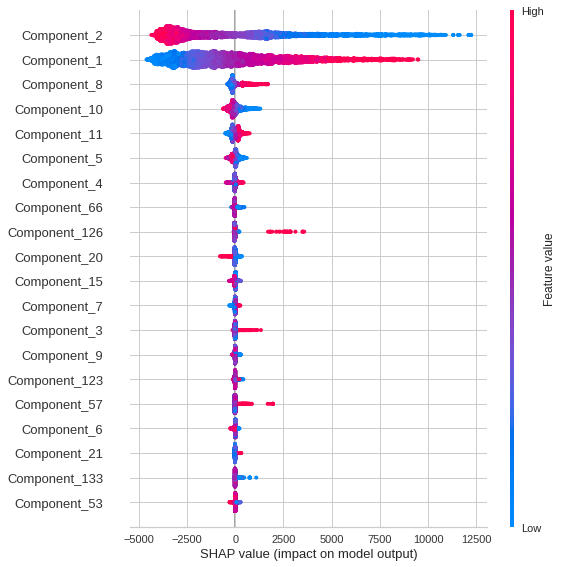

In [19]:
interpret_model(optimizar_modelo, observation=32)

In [21]:
modelo_final= finalize_model(optimizar_modelo)

In [22]:
modelo_final

ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse', max_depth=9,
                    max_features=1.0, max_leaf_nodes=None, max_samples=None,
                    min_impurity_decrease=0.1, min_impurity_split=None,
                    min_samples_leaf=4, min_samples_split=7,
                    min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                    oob_score=False, random_state=123, verbose=0,
                    warm_start=False)

In [26]:
evaluate_model(modelo_final)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [42]:
import os
import pickle

In [43]:
path = os.getcwd() + "/drive/MyDrive/Modelos/modelo_final.pkl"

In [48]:
file = open(path, "wb")
pickle.dump(modelo_final, file)

In [49]:
file = open(path, "rb")
modelo_ad = pickle.load(file)